In [18]:
#importing modules
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
#importing under sampling dataset
ecommerce_df = pd.read_csv(Path('Resources/Cleaned_data/over_sampling_data.csv'))

In [4]:
#looking the few rows
ecommerce_df.head()

,Administrative_Avg,Informational_Avg,ProductRelated_Avg,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,32.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,Feb,Other,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,1.333333,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,62.750000,0.02,0.05,0.0,0.0,Feb,3,Other,1,4,Returning_Visitor,True,False


In [5]:
ecommerce_df["Revenue"].value_counts()

False    10422
True     10422
Name: Revenue, dtype: int64

In [6]:
#shape of dataframe
ecommerce_df.shape

(20844, 15)

In [7]:
# create feature matrix (X)
#selecting all columns except 'Revenue'
X=ecommerce_df.drop('Revenue', axis=1) 

# create response vector (y)
##selecting 'Revenue' column
y=ecommerce_df['Revenue'].values 

In [8]:
# Seperating categorical columns
cat_columns=['Month','OperatingSystems', 'Browser', 'Region',
             'TrafficType','VisitorType','Weekend']

In [9]:
# One-hot encoding the entire dataframe
X_dummies = pd.get_dummies(X, columns = cat_columns)
print(X_dummies.columns)
X_dummies.head()

Index(['Administrative_Avg', 'Informational_Avg', 'ProductRelated_Avg',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_Other', 'Browser_1', 'Browser_10', 'Browser_2',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_Other', 'Region_1',
       'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7',
       'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_10',
       'TrafficType_11', 'TrafficType_13', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_8',
       'TrafficType_Other', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True'],
      dtype='object')


,Administrative_Avg,Informational_Avg,ProductRelated_Avg,BounceRates,ExitRates,PageValues,SpecialDay,Month_Aug,Month_Dec,Month_Feb,...,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_8,TrafficType_Other,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,0.0,0.0,32.000000,0.00,0.10,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,0.0,0.0,1.333333,0.05,0.14,0.0,0.0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
4,0.0,0.0,62.750000,0.02,0.05,0.0,0.0,0,0,1,...,1,0,0,0,0,0,0,1,0,1


In [10]:
#Total columns before and after one-hot encoding
print(f'Total column before one hot encoding: {X.shape[1]}, Total columns after one hot encoding: {X_dummies.shape[1]}')

Total column before one hot encoding: 14, Total columns after one hot encoding: 53


In [11]:
# Converting output labels to 0 and 1
y_label = LabelEncoder().fit_transform(y)
y_label

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
#Training set**: Used to train the classifier.
#Testing set**: Used to estimate the error rate of the trained classifier.
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=42)

In [13]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.49176122, -0.26201191, -0.35329174, ...,  0.46069117,
        -1.77048594,  1.77048594],
       [ 2.845514  , -0.12725511,  0.09027359, ...,  0.46069117,
         0.56481668, -0.56481668],
       [-0.11814113,  0.20739094, -0.17978272, ...,  0.46069117,
         0.56481668, -0.56481668],
       ...,
       [-0.49176122, -0.26201191, -0.06603435, ...,  0.46069117,
        -1.77048594,  1.77048594],
       [-0.30633607, -0.26201191, -0.22378354, ..., -2.17065155,
         0.56481668, -0.56481668],
       [-0.49176122, -0.26201191, -0.39395585, ...,  0.46069117,
         0.56481668, -0.56481668]])

In [14]:
# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.48263956, -0.26201191,  0.08368685, ...,  0.46069117,
         0.56481668, -0.56481668],
       [-0.49176122, -0.26201191, -0.22028632, ...,  0.46069117,
         0.56481668, -0.56481668],
       [-0.49176122,  6.04385761,  0.8350282 , ...,  0.46069117,
        -1.77048594,  1.77048594],
       ...,
       [-0.49176122, -0.26201191, -0.7231451 , ..., -2.17065155,
        -1.77048594,  1.77048594],
       [ 0.04417273,  1.07183085, -0.17184811, ...,  0.46069117,
        -1.77048594,  1.77048594],
       [-0.49176122, -0.26201191, -0.60712615, ..., -2.17065155,
         0.56481668, -0.56481668]])

In [15]:
#defining function for model scoring with training set only
def train_score(model, X_train_scaled=X_train_scaled, y_train=y_train):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    print("******************Train Score******************")
    print(train_score)
    print()
    
    cvs=cross_val_score(model,X_train_scaled, y_train,cv=3, scoring='accuracy' )
    print("************Using K=3 cross validation**********")
    print(cvs)
    print()
    
    #predection on the test set and confusion matrix
    y_train_pred=cross_val_predict(model,X_train_scaled, y_train,cv=3)
    cm=confusion_matrix(y_train, y_train_pred)
    print("******Confusion Matrix using cross_val_predict****")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_train, y_train_pred)
    print("***********Classification Report******************")
    print(cr)
    print()
    
    #roc curve
    y_train_predc=cross_val_predict(model,X_train_scaled, y_train,cv=3,
                                    method="predict_proba")
    y_proba = y_train_predc[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_train, y_proba)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"roc curve for {model}")
    print("ROC Curve")
    plt.show()
    
    # area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    roc_auc
    print()
    print("**************Area under the curve******************")
    print(roc_auc)
    
    
    
#defining function for model scoring with test set
def test_score(model, X_train_scaled=X_train_scaled, X_test_scaled=X_test_scaled, 
               y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    print("********************Train Score******************")
    print(train_score)
    print()

    print("*********************Test Score******************")
    print(test_score)
    print()
    
    #predection on the test set and confusion matrix
    y_pred=model.predict(X_test_scaled)
    cm=confusion_matrix(y_test, y_pred)
    print("**************Confusion Matrix******************")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_test, y_pred)
    print("**********Classification Report******************")
    print(cr)
    print()
    
    #roc curve
    y_proba = model.predict_proba(X_test_scaled)[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"roc curve for {model}")
    print("ROC Curve")
    plt.show()
    
    # area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    roc_auc
    print()
    print("**************Area under the curve******************")
    print(roc_auc)


In [16]:
## Stochastic Gradent Descent Classifier

In [19]:
# Creating a sgd classifier model on the scaled data
sgd=SGDClassifier(random_state=42, loss='log', penalty='l2')

# Fit the model to the data
sgd.fit(X_train_scaled, y_train)

SGDClassifier(loss='log', random_state=42)

******************Train Score******************
0.8096334676645558

************Using K=3 cross validation**********
[0.8025331  0.80656304 0.80694684]

******Confusion Matrix using cross_val_predict****
[[6472 1310]
 [1733 6118]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7782
           1       0.82      0.78      0.80      7851

    accuracy                           0.81     15633
   macro avg       0.81      0.81      0.81     15633
weighted avg       0.81      0.81      0.81     15633


ROC Curve


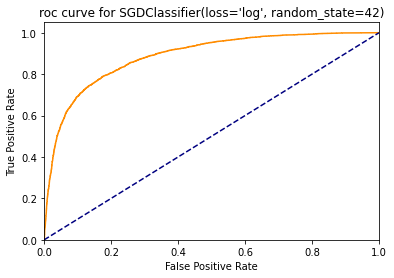


**************Area under the curve******************
0.8867596009865184


In [20]:
#score for logistic regression using only training data
train_score(sgd)

### Tuning hyperparamaters using Grid Search CV for Stochastic Gradent Descent Classifier

In [21]:
#### Using GridSearchCV
param_grid_sgd = {
              'penalty': ['l1','l2'],
             'loss':['log', 'modified_huber'],
                'max_iter':[500,1000, 2000]}
grid_sgd = GridSearchCV(sgd, param_grid_sgd, cv=5, verbose=1, n_jobs=-1)

In [22]:
grid_sgd.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SGDClassifier(loss='log', random_state=42),
             n_jobs=-1,
             param_grid={'loss': ['log', 'modified_huber'],
                         'max_iter': [500, 1000, 2000],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [23]:
# best parameters for this dataset
print(grid_sgd.best_params_)

{'loss': 'log', 'max_iter': 500, 'penalty': 'l1'}


In [24]:
# best score
print(grid_sgd.best_score_)

0.8084180238530898


In [25]:
#best estimator
sgd_b=grid_sgd.best_estimator_
sgd_b

SGDClassifier(loss='log', max_iter=500, penalty='l1', random_state=42)

******************Train Score******************
0.8088658606793322

************Using K=3 cross validation**********
[0.8025331  0.80905776 0.80061409]

******Confusion Matrix using cross_val_predict****
[[6489 1293]
 [1770 6081]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7782
           1       0.82      0.77      0.80      7851

    accuracy                           0.80     15633
   macro avg       0.81      0.80      0.80     15633
weighted avg       0.81      0.80      0.80     15633


ROC Curve


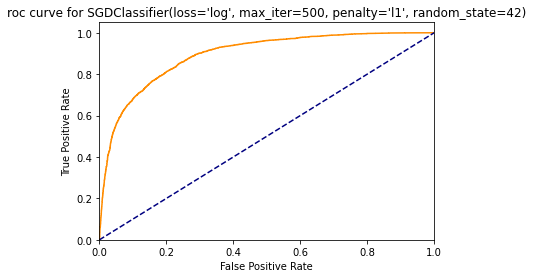


**************Area under the curve******************
0.8918546161135759


In [26]:
#score for Stochastic Gradent Descent Classifier using training data
train_score(sgd_b)